In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
ls

CNN/           MLP/           MNIST_data/    summary.ipynb
CNN_batchnorm/ MLP_batchnorm/ data/


In [101]:
name = ['MLP/MLP_001.001','MLP_batchnorm/MLP_300dropout','MLP_batchnorm/MLP_300nodropout.001','CNN/CNN_dropout_3*3'
        ,'CNN/CNN_dropout_5*5_swish','CNN/CNN_dropout_3*3_swish','CNN/CNN_dropout_7*7','CNN/CNN_dropout_5*5',
        'CNN/CNN_no_dropout','CNN_batchnorm/CNN_dropout_3*3','CNN_batchnorm/CNN_dropout_5*5_swish',
        'CNN_batchnorm/CNN_dropout_3*3_swish','CNN_batchnorm/CNN_dropout_7*7','CNN_batchnorm/CNN_dropout_5*5',
        'CNN_batchnorm/CNN_no_dropout']

In [164]:
title = ['MLP','MLP_batchnorm_dropout','MLP_batchnorm_nodropout','CNN_dropout_3*3'
        ,'CNN_dropout_5*5_swish','CNN_dropout_3*3_swish','CNN_dropout_7*7','CNN_dropout_5*5',
        'CNN_no_dropout','CNN_batchnorm_dropout_3*3','CNN_batchnorm_dropout_5*5_swish',
        'CNN_batchnorm/CNN_dropout_3*3_swish','CNN_batchnorm_dropout_7*7','CNN_batchnorm_dropout_5*5',
        'CNN_batchnorm_no_dropout']

In [102]:
len(name)

15

In [104]:
train = {}
for i in range(15):
    train[i] = np.loadtxt(name[i]+'/train.log',dtype = 'S',delimiter = '\n')

In [105]:
#add time together
time ={}
for i in range(15):
    time[i] = 0
    for j in range(100):
        time[i] = time[i]+float(train[i][j].split(' ')[6].split('s')[0])
    print str(time[i])

214.744787455
313.839949846
256.667508125
466.629805565
567.284263372
471.637915373
608.492558956
563.172636271
580.90893507
565.422010899
566.611602068
600.332966328
552.461577415
559.527239323
500.623311996


In [115]:
#validation acc and loss for plot
valid_acc ={}
valid_loss ={}
for i in range(15):
    valid_acc[i] =np.array([])
    valid_loss[i] =np.array([])
    for j in range(100):
        valid_acc[i]= np.concatenate((valid_acc[i],np.array([float(train[i][j].split('[')[6].split(' ')[-2][:-2])])))
        valid_loss[i] = np.concatenate((valid_loss[i],np.array([float(train[i][j].split('[')[5].split(' ')[-2][:-2])])))

In [116]:
# all test loss and acc
for i in range(15):
    print "loss:"+train[i][99].split('[')[9].split(' ')[-2][:-2], "acc:"+train[i][99].split('[')[10].split(' ')[20][:-2]

loss:1.4846088802 acc:0.976565663261
loss:1.48135933491 acc:0.97979799485
loss:1.47997909002 acc:0.982222179572
loss:nan acc:0.0979999961331
loss:1.47557715774 acc:0.985499976873
loss:1.4716599071 acc:0.989399988055
loss:2.30258501053 acc:0.0979999962822
loss:2.3637499547 acc:0.0973999965191
loss:1.47100505233 acc:0.990199999809
loss:1.47711589932 acc:0.984999985099
loss:1.47117298961 acc:0.990699998736
loss:1.47558417201 acc:0.986000005603
loss:1.46933114648 acc:0.992299989462
loss:1.47117853761 acc:0.990799990296
loss:1.47012309909 acc:0.991499993801


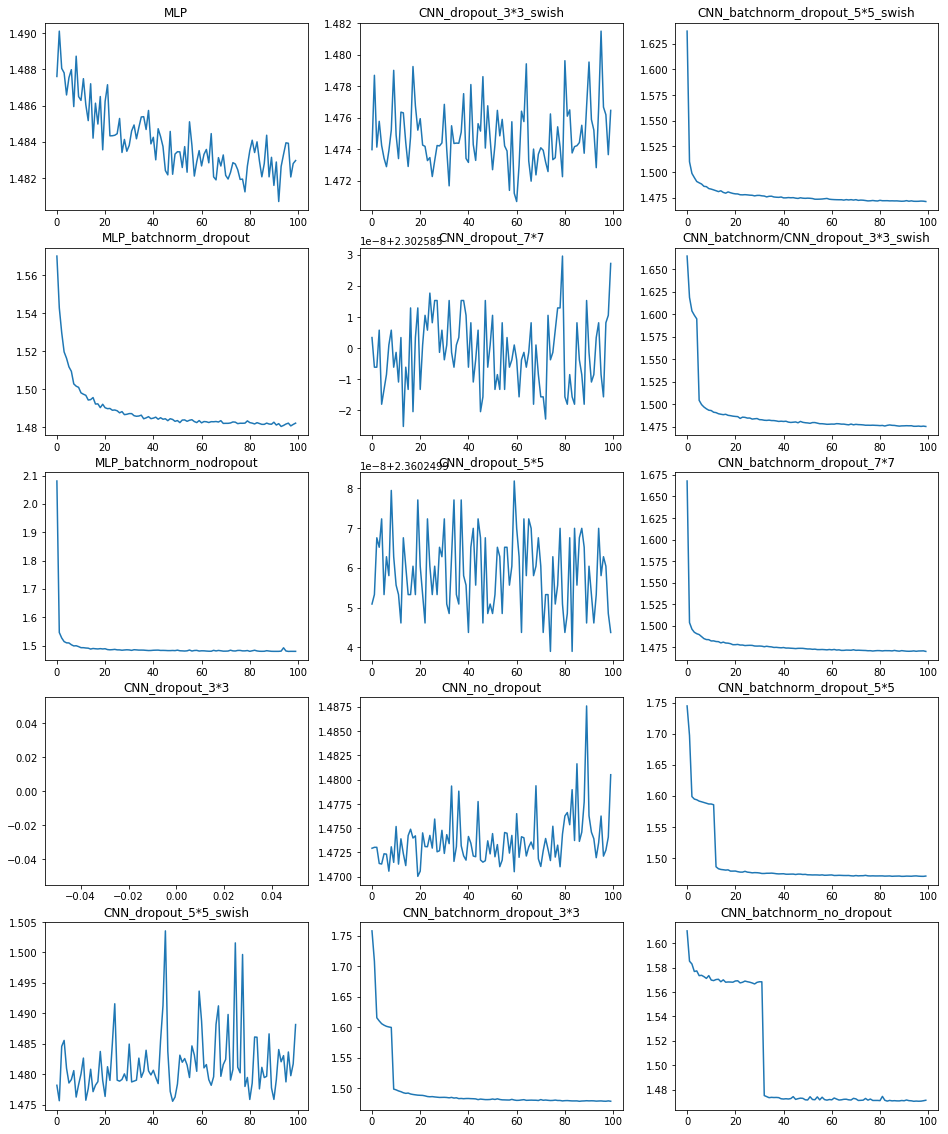

In [170]:
fig, ax = subplots(5, 3, figsize=(16, 20))
for i in range(3):
    for j in range(5):
        ax[j,i].plot(valid_loss[5*i+j])
        ax[j,i].set_title(title[5*i+j])

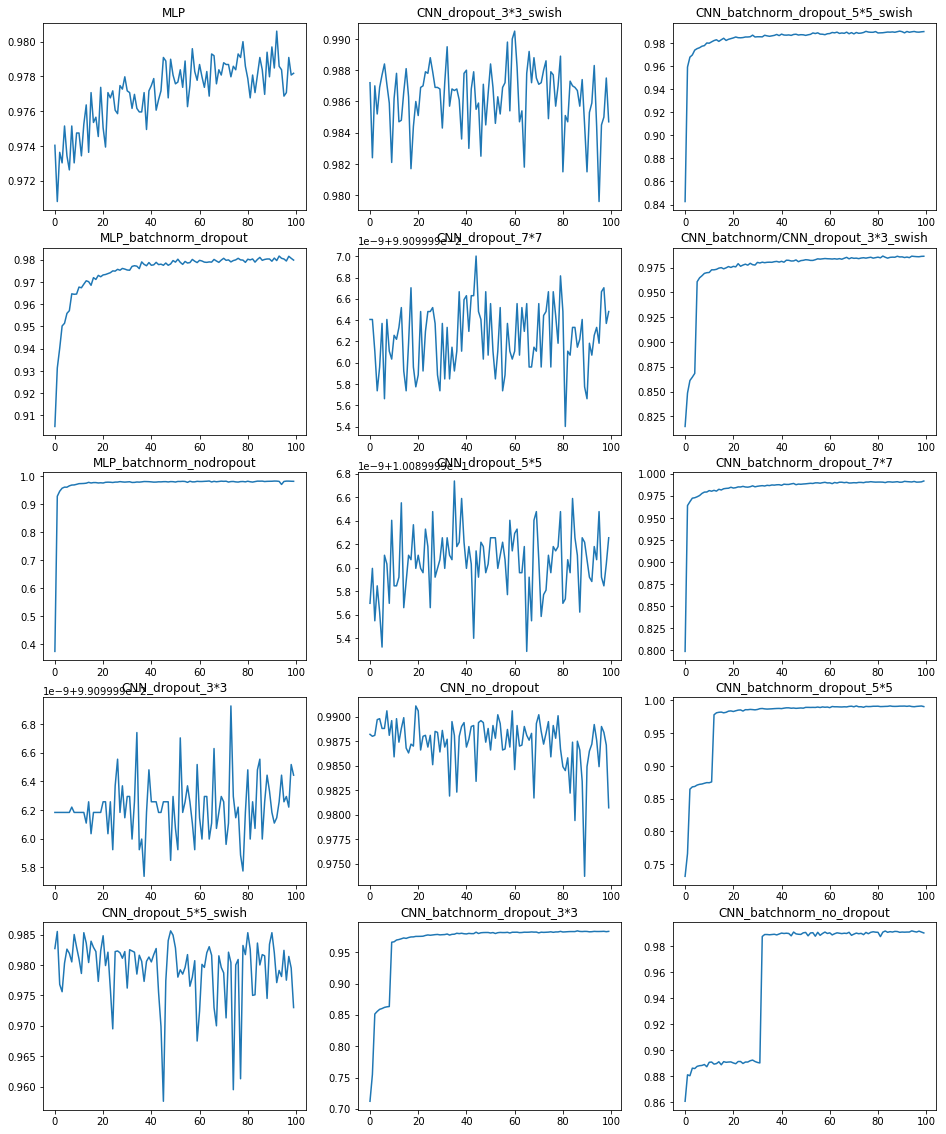

In [171]:
fig, ax = subplots(5, 3, figsize=(16, 20))
for i in range(3):
    for j in range(5):
        ax[j,i].plot(valid_acc[5*i+j])
        ax[j,i].set_title(title[5*i+j])

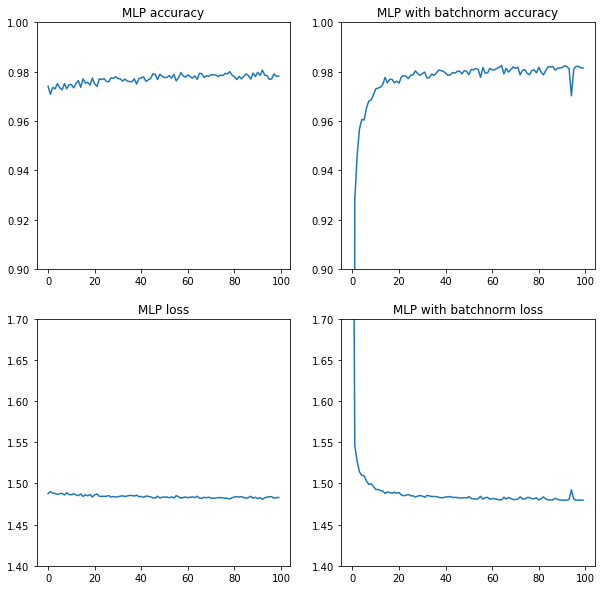

In [160]:
#MLP contrast
fig, ax = subplots(2, 2, figsize=(10, 10))
ax[0,0].plot(valid_acc[0])
ax[0,0].set_ylim(0.9,1)
ax[0,0].set_title('MLP accuracy')
ax[0,1].plot(valid_acc[2])
ax[0,1].set_ylim(0.9,1)
ax[0,1].set_title('MLP with batchnorm accuracy')
ax[1,0].plot(valid_loss[0])
ax[1,0].set_ylim(1.4,1.7)
ax[1,0].set_title('MLP loss')
ax[1,1].plot(valid_loss[2])
ax[1,1].set_ylim(1.4,1.7)
ax[1,1].set_title('MLP with batchnorm loss')

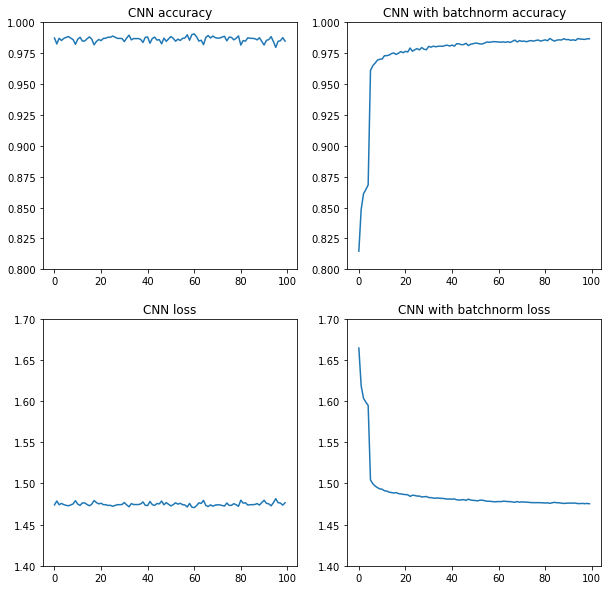

In [179]:
#CNN contrast
fig, ax = subplots(2, 2, figsize=(10, 10))
ax[0,0].plot(valid_acc[5])
ax[0,0].set_ylim(0.8,1)
ax[0,0].set_title('CNN accuracy')
ax[0,1].plot(valid_acc[11])
ax[0,1].set_ylim(0.8,1)
ax[0,1].set_title('CNN with batchnorm accuracy')
ax[1,0].plot(valid_loss[5])
ax[1,0].set_ylim(1.4,1.7)
ax[1,0].set_title('CNN loss')
ax[1,1].plot(valid_loss[11])
ax[1,1].set_ylim(1.4,1.7)
ax[1,1].set_title('CNN with batchnorm loss')

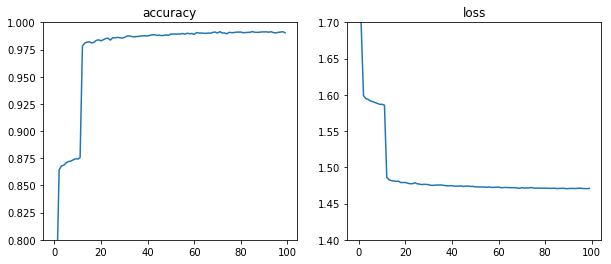

In [180]:
#CNN  5*5 dropout  batchnorm
fig, ax = subplots(1, 2, figsize=(10, 4))
ax[0].plot(valid_acc[13])
ax[0].set_ylim(0.8,1)
ax[0].set_title('accuracy')
ax[1].plot(valid_loss[13])
ax[1].set_ylim(1.4,1.7)
ax[1].set_title('loss')

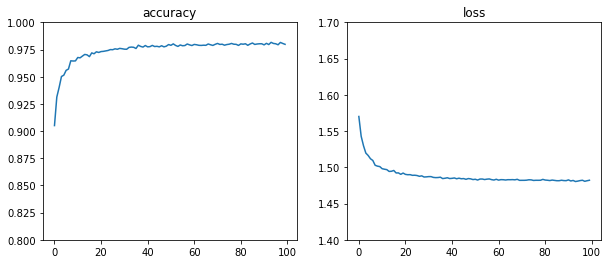

In [181]:
#MLP   batchnorm  dropout
fig, ax = subplots(1, 2, figsize=(10, 4))
ax[0].plot(valid_acc[1])
ax[0].set_ylim(0.8,1)
ax[0].set_title('accuracy')
ax[1].plot(valid_loss[1])
ax[1].set_ylim(1.4,1.7)
ax[1].set_title('loss')